In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sea 

In [2]:
%matplotlib inline 

In [4]:
from collections import Counter

In [7]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold,learning_curve,KFold
from sklearn.metrics import classification_report,accuracy_score

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('adult.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [46]:
df=df.fillna(np.nan)

In [47]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [13]:
df.shape

(32561, 15)

In [14]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [15]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [16]:
df['income']=df['income'].map({'<=50K':0,'>50K':1})

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [18]:
df_numberical=df.select_dtypes(['int64','float64'])
df_categorical=df.select_dtypes(['object'])

In [19]:
df_numberical.shape,df_categorical.shape

((32561, 7), (32561, 8))

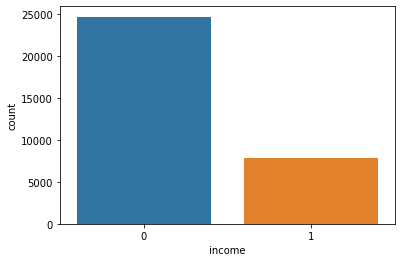

In [22]:
sea.countplot(df['income'],label='Count')
plt.show()

In [27]:
var1=df_numberical.corr()

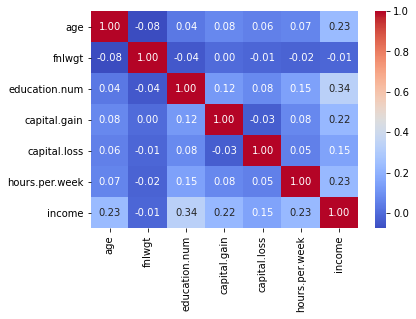

In [30]:
sea.heatmap(var1,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [32]:
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

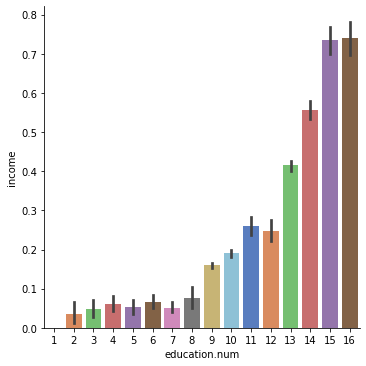

In [33]:
sea.factorplot(x='education.num',y='income',data=df,kind='bar',palette='muted')
plt.show()

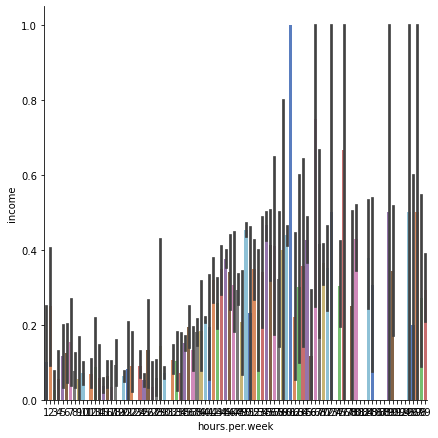

In [41]:
sea.factorplot(x='hours.per.week',y='income',data=df,kind='bar',size=6,palette='muted')
plt.show()

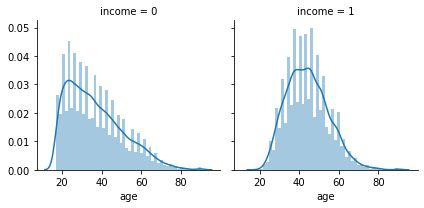

In [43]:
g=sea.FacetGrid(df,col='income')
g.map(sea.distplot,'age')
plt.show()

In [45]:
df_categorical.isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
dtype: int64

In [48]:
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

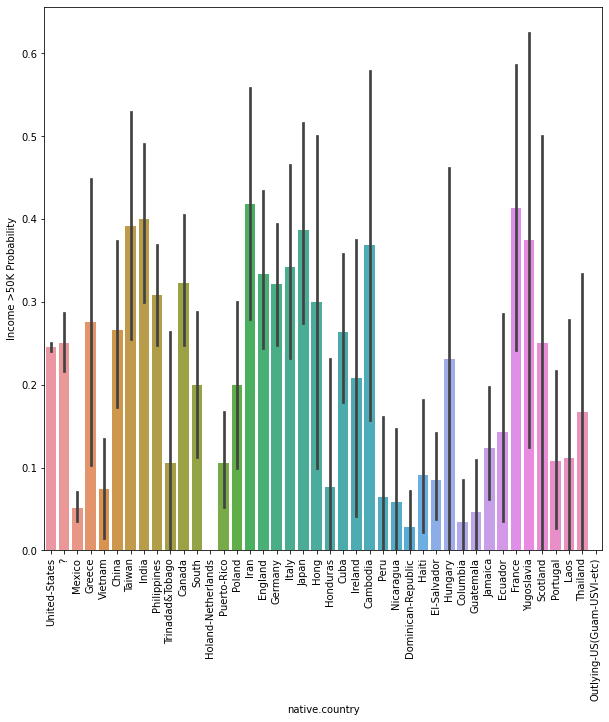

In [56]:
plt.figure(figsize=(10,10))
g = sea.barplot(x="native.country",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=90)
plt.show()

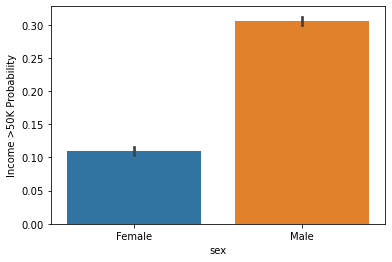

In [64]:
g=sea.barplot(df['sex'],df['income'])
g=g.set_ylabel('Income >50K Probability')
plt.show()

In [65]:
df.groupby(['sex','income'])['income'].count()

sex     income
Female  0          9592
        1          1179
Male    0         15128
        1          6662
Name: income, dtype: int64

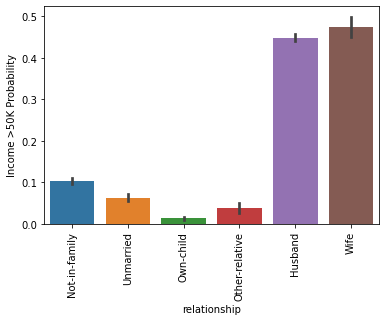

In [67]:
g=sea.barplot(df['relationship'],df['income'])
g=g.set_ylabel('Income >50K Probability')
plt.xticks(rotation=90)
plt.show()

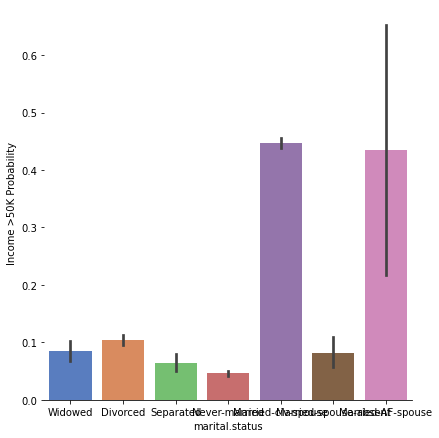

In [69]:
g = sea.factorplot(x="marital.status",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

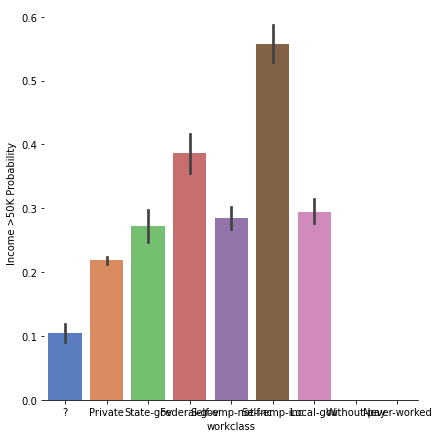

In [70]:
g = sea.factorplot(x="workclass",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [71]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])

In [74]:
df['sex'].unique()

array([0, 1])

In [77]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [78]:
df['marital.status']=df['marital.status'].replace(['Widowed','Divorced','Separated','Never-married'],'single')

In [79]:
df['marital.status']=df['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'married')

In [82]:
df['marital.status'].unique()

array([1, 0])

In [81]:
df['marital.status']=lb.fit_transform(df['marital.status'])

In [83]:
df.shape

(32561, 15)

In [84]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [87]:
df.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)

In [88]:
df.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,1,0,0,4356,40,0
1,82,132870,9,1,0,0,4356,18,0
2,66,186061,10,1,0,0,4356,40,0
3,54,140359,4,1,0,0,3900,40,0
4,41,264663,10,1,0,0,3900,40,0


In [89]:
df.nunique()

age                  73
fnlwgt            21648
education.num        16
marital.status        2
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
income                2
dtype: int64

In [90]:
array=df.values

In [92]:
x=df.drop('income',axis=1).values
y=df['income'].values

In [93]:
x

array([[    90,  77053,      9, ...,      0,   4356,     40],
       [    82, 132870,      9, ...,      0,   4356,     18],
       [    66, 186061,     10, ...,      0,   4356,     40],
       ...,
       [    40, 154374,      9, ...,      0,      0,     40],
       [    58, 151910,      9, ...,      0,      0,     40],
       [    22, 201490,      9, ...,      0,      0,     20]], dtype=int64)

In [94]:
validation_size=0.20
seed=7
num_fold=10
scoring='accuracy'
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

In [95]:
num_tree=100
max_feature=3

In [98]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_tree, max_features=max_feature)))

In [115]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier(max_features=3))]

In [100]:
results=[]
names=[]

In [103]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796913 (0.006794)
LDA: 0.829584 (0.005290)
KNN: 0.773572 (0.005535)
CART: 0.809736 (0.007654)
NB: 0.794495 (0.006482)
RF: 0.841332 (0.004218)


In [116]:
cv_results

array([0.8353167 , 0.83877159, 0.83454894, 0.83953935, 0.84568138,
       0.84299424, 0.84184261, 0.84069098, 0.84715822, 0.84677419])

In [117]:
results

[array([0.79347409, 0.79769674, 0.80153551, 0.7815739 , 0.79539347,
        0.80575816, 0.80690979, 0.79347409, 0.79646697, 0.796851  ]),
 array([0.82418426, 0.83877159, 0.82917466, 0.82571977, 0.82456814,
        0.83723608, 0.83493282, 0.82456814, 0.83064516, 0.82603687]),
 array([0.77044146, 0.77120921, 0.78003839, 0.76737044, 0.76276392,
        0.78042226, 0.7731286 , 0.77581574, 0.77457757, 0.77995392]),
 array([0.80882917, 0.81036468, 0.80882917, 0.79462572, 0.8084453 ,
        0.82072937, 0.81036468, 0.79961612, 0.8172043 , 0.81835637]),
 array([0.79117083, 0.79232246, 0.79961612, 0.778119  , 0.79731286,
        0.79961612, 0.80115163, 0.79577735, 0.79109063, 0.79877112]),
 array([0.8353167 , 0.83877159, 0.83454894, 0.83953935, 0.84568138,
        0.84299424, 0.84184261, 0.84069098, 0.84715822, 0.84677419])]

In [118]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'RF']

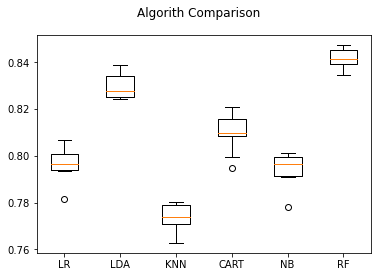

In [119]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [120]:
n_estimators=np.array([50,100,150,200,250])
max_features=np.array([1,2,3,4,5])
param_grid=dict(n_estimators=n_estimators,max_features=max_features)

In [121]:
model=RandomForestClassifier()

In [122]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [123]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)

In [124]:
grid_result=grid.fit(x_train,y_train)

In [125]:
grid_result.best_score_

0.8414854306529745

In [126]:
grid_result.best_params_

{'max_features': 1, 'n_estimators': 250}

In [130]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.839719 (0.004766) with: {'max_features': 1, 'n_estimators': 50}
0.840218 (0.005895) with: {'max_features': 1, 'n_estimators': 100}
0.840794 (0.004725) with: {'max_features': 1, 'n_estimators': 150}
0.841293 (0.004801) with: {'max_features': 1, 'n_estimators': 200}
0.841485 (0.006475) with: {'max_features': 1, 'n_estimators': 250}
0.839719 (0.004391) with: {'max_features': 2, 'n_estimators': 50}
0.840756 (0.004739) with: {'max_features': 2, 'n_estimators': 100}
0.840718 (0.005506) with: {'max_features': 2, 'n_estimators': 150}
0.840948 (0.005502) with: {'max_features': 2, 'n_estimators': 200}
0.839182 (0.005607) with: {'max_features': 2, 'n_estimators': 250}
0.839566 (0.005583) with: {'max_features': 3, 'n_estimators': 50}
0.840218 (0.004267) with: {'max_features': 3, 'n_estimators': 100}
0.840602 (0.005236) with: {'max_features': 3, 'n_estimators': 150}
0.841140 (0.005479) with: {'max_features': 3, 'n_estimators': 200}
0.841485 (0.005552) with: {'max_features': 3, 'n_estimators': 250

In [127]:
model_rf=RandomForestClassifier(n_estimators=250,max_features=1)

In [128]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=250)

In [131]:
y_pred=model_rf.predict(x_test)

In [132]:
accuracy_score(y_test,y_pred)

0.8427759864885613

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4964
           1       0.70      0.60      0.64      1549

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

